In [1]:
import glob
from PIL import Image, ImageOps
from skimage import io, transform
from preprocessing.image_preprocess import open_image, transform_img, remove_border_1, remove_border_2, pad_to_square, resize
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
import cv2


# image 


In [2]:
%%time
img_name = "../all_train/4/3412_right.jpeg"
size = 400
image = image_0 = open_image(img_name)
image = transform_img(image, remove_border_1)
image = pad_to_square(image)
image = resize(image, size)

CPU times: user 457 ms, sys: 56.6 ms, total: 514 ms
Wall time: 509 ms


In [9]:
image.size

(405, 405)

In [10]:

preprocess = transforms.Compose([
    transforms.Resize([400, 400]),
#     transforms.CenterCrop(256),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


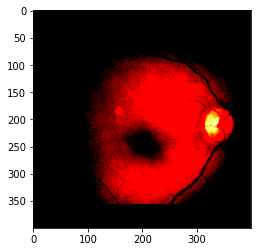

In [11]:
# z = input_tensor.numpy()*255
# z = z.reshape(
plt.imshow(input_tensor.permute(1, 2, 0))

In [12]:
input_tensor.permute(1, 2, 0).shape

torch.Size([400, 400, 3])

In [13]:
image2.size

NameError: name 'image2' is not defined

In [46]:
# !pip install opencv-python
# !pip install scikit-image

In [47]:
# !pip install torchvision

# Preprocess and Save

In [ ]:
import glob, os
from tqdm import tqdm
from preprocessing.image_preprocess import open_image, load_transform_image
size = 400
data_dir = "../all_train"
out_dir = "../new_all_train_400"

os.makedirs(out_dir, exist_ok=True)
for i in range(5):
    os.makedirs(f"{out_dir}/{i}", exist_ok=True)
x = glob.glob(f"{data_dir}/*/*.jpeg")

j = 0
for ix, i in tqdm(enumerate(x), total=len(x)):
    old_filename = i
    new_filename = i.replace("all_train", "new_all_train_400")
    j+=1
    if j %1000 == 0:
        print("Done:", j, new_filename)
    if os.path.exists(new_filename):
        continue
    img = load_transform_image(i,size)
    if img is None:
        print("Error ====")
        continue
    img.save(new_filename)
#     raise Exception()


  0%|          | 68/35126 [00:27<5:22:21,  1.81it/s]

Error on func! <function remove_border_1 at 0x7f070b2a1cb0>
Error on func! <function remove_border_1 at 0x7f070b2a1cb0>



  0%|          | 76/35126 [00:31<4:00:34,  2.43it/s]